In [8]:
filename = 'C:/Users/User/PycharmProjects/bioinfomatics/BRCA_prognosis.txt'
with open(filename, 'r') as fin:
    lines = fin.readlines()

samples = lines[0].rstrip().split('\t')[1:]
labels = lines[1].rstrip().split('\t')[1:]
genes = []
data = []

for line in lines[2:]:
    tmp = line.rstrip().split('\t')
    genes.append(tmp[0])
    data.append(tmp[1:])

import numpy as np
data = np.array(data, dtype=np.float32).T
labels = np.array(labels, dtype=np.float32)

from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

In [109]:
# Knn

from matplotlib import pyplot
import pandas as pd
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

n = [3, 5, 7, 9, 11, 13, 15]

acc = []
sen = []
spe = []
pre = []
rec = []
fsc = []

for i in n:

    clf = KNeighborsClassifier(n_neighbors=i)

    clf.fit(data_train, labels_train)

    prediction_test = clf.predict(data_test)
    probability_test = clf.predict_proba(data_test)[:, 1]


    auc = roc_auc_score(labels_test, probability_test)

    tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fscore = 2 * precision * recall / (precision + recall)

    acc.append(accuracy)
    sen.append(sensitivity)
    spe.append(specificity)
    pre.append(precision)
    rec.append(recall)
    fsc.append(fscore)



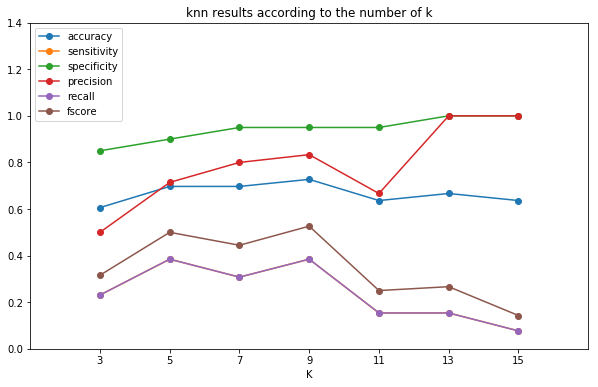

In [110]:
fig = pyplot.figure(figsize=(10,6))
pyplot.title("knn results according to the number of k")
pyplot.xlim([1,17])
pyplot.ylim([0,1.4])
pyplot.xlabel("K")
pyplot.xticks(n)
pyplot.plot(n, acc, label='accuracy', marker='o')
pyplot.plot(n, sen, label='sensitivity', marker='o')
pyplot.plot(n, spe, label='specificity', marker='o')
pyplot.plot(n, pre, label='precision', marker='o')
pyplot.plot(n, rec, label='recall', marker='o')
pyplot.plot(n, fsc, label='fscore', marker='o')
pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/Knn.png')

In [111]:
max_acc = max(acc)
id = acc.index(max_acc)

data = {'value': [acc[id], sen[id], spe[id], pre[id], rec[id], fsc[id]]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.727273
sensitivity,0.384615
specificity,0.950000
precision,0.833333
recall,0.384615
fscore,0.526316


In [112]:
# naive bayesian classification

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(data_train, labels_train)

prediction_test = clf.predict(data_test)
probability_test = clf.predict_proba(data_test)[:,1]

from sklearn.metrics import confusion_matrix, roc_auc_score

auc = roc_auc_score(labels_test, probability_test)

tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
accuracy = (tp + tn) / (tn + tp + fn + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = 2 * precision * recall / (precision + recall)

In [113]:
data = {'value': [accuracy, sensitivity, specificity, precision, recall, fscore]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.606061
sensitivity,0.461538
specificity,0.700000
precision,0.500000
recall,0.461538
fscore,0.480000


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

n = [3, 5, 7, 9, 11, 13, 15]

acc = []
sen = []
spe = []
pre = []
rec = []
fsc = []

for i in n:

    clf = DecisionTreeClassifier(criterion='gini', max_depth=i)

    clf.fit(data_train, labels_train)

    prediction_test = clf.predict(data_test)
    probability_test = clf.predict_proba(data_test)[:,1]


    auc = roc_auc_score(labels_test, probability_test)

    tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fscore = 2 * precision * recall / (precision + recall)

    acc.append(accuracy)
    sen.append(sensitivity)
    spe.append(specificity)
    pre.append(precision)
    rec.append(recall)
    fsc.append(fscore)

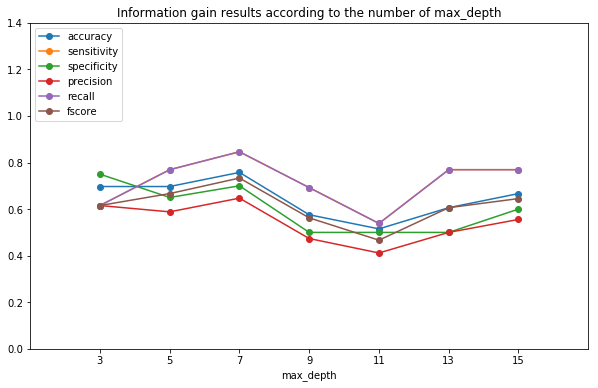

In [115]:
fig = pyplot.figure(figsize=(10,6))
pyplot.title("Information gain results according to the number of max_depth")
pyplot.xlim([1,17])
pyplot.ylim([0,1.4])
pyplot.xlabel("max_depth")
pyplot.xticks(n)
pyplot.plot(n, acc, label='accuracy', marker='o')
pyplot.plot(n, sen, label='sensitivity', marker='o')
pyplot.plot(n, spe, label='specificity', marker='o')
pyplot.plot(n, pre, label='precision', marker='o')
pyplot.plot(n, rec, label='recall', marker='o')
pyplot.plot(n, fsc, label='fscore', marker='o')
pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/information_gain.png')

In [116]:
max_acc = max(acc)
id = acc.index(max_acc)

data = {'value': [acc[id], sen[id], spe[id], pre[id], rec[id], fsc[id]]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.757576
sensitivity,0.846154
specificity,0.700000
precision,0.647059
recall,0.846154
fscore,0.733333


In [117]:
from sklearn.svm import SVC
from sklearn import svm, datasets
clf = SVC(kernel='poly', probability=True)

clf.fit(data_train, labels_train)

prediction_test = clf.predict(data_test)
probability_test = clf.predict_proba(data_test)[:,1]

from sklearn.metrics import confusion_matrix, roc_auc_score

auc = roc_auc_score(labels_test, probability_test)

tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
accuracy = (tp + tn) / (tn + tp + fn + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = 2 * precision * recall / (precision + recall)

In [16]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

acc = []
sen = []
spe = []
pre = []
rec = []
fsc = []

In [17]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, roc_auc_score

for i in kernel:
    clf = SVC(kernel=i, probability=True)

    clf.fit(data_train, labels_train)

    prediction_test = clf.predict(data_test)
    probability_test = clf.predict_proba(data_test)[:,1]

    auc = roc_auc_score(labels_test, probability_test)

    tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fscore = 2 * precision * recall / (precision + recall)

    acc.append(accuracy)
    sen.append(sensitivity)
    spe.append(specificity)
    pre.append(precision)
    rec.append(recall)
    fsc.append(fscore)

C:\Users\hwk07\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


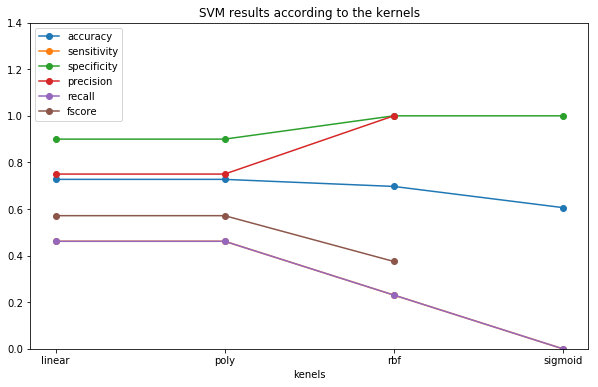

In [19]:
fig = pyplot.figure(figsize=(10,6))
pyplot.title("SVM results according to the kernels")
pyplot.ylim([0,1.4])
pyplot.xlabel("kenels")
pyplot.xticks(np.arange(4),kernel)
pyplot.plot(acc, label='accuracy', marker='o')
pyplot.plot(sen, label='sensitivity', marker='o')
pyplot.plot(spe, label='specificity', marker='o')
pyplot.plot(pre, label='precision', marker='o')
pyplot.plot(rec, label='recall', marker='o')
pyplot.plot(fsc, label='fscore', marker='o')
pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/SVM.png')

In [22]:
max_acc = max(acc)
id = acc.index(max_acc)
id = 3

data = {'value': [acc[id], sen[id], spe[id], pre[id], rec[id], fsc[id]]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.606061
sensitivity,0.000000
specificity,1.000000
precision,NaN
recall,0.000000
fscore,NaN


In [27]:
sen
rec

[0.46153846153846156, 0.46153846153846156, 0.23076923076923078, 0.0]

In [5]:
act = ['identity', 'logistic', 'tanh', 'relu']
sol = ['lbfgs', 'sgd', 'adam']

In [142]:
acc = []
sen = []
spe = []
pre = []
rec = []
fsc = []

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

for i in act:
    clf = MLPClassifier(hidden_layer_sizes=(1024, 256, 32),
                    activation= i,
                    solver='adam',
                    learning_rate_init=0.01)

    clf.fit(data_train, labels_train)

    prediction_test = clf.predict(data_test)
    probability_test = clf.predict_proba(data_test)[:,1]

    auc = roc_auc_score(labels_test, probability_test)

    tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fscore = 2 * precision * recall / (precision + recall)

    acc.append(accuracy)
    sen.append(sensitivity)
    spe.append(specificity)
    pre.append(precision)
    rec.append(recall)
    fsc.append(fscore)

C:\Users\hwk07\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


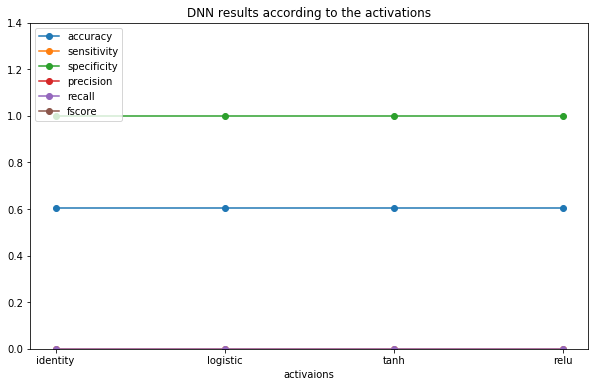

In [143]:
fig = pyplot.figure(figsize=(10,6))
pyplot.title("DNN results according to the activations")
pyplot.ylim([0,1.4])
pyplot.xlabel("activaions")
pyplot.xticks(np.arange(4),act)
pyplot.plot(acc, label='accuracy', marker='o')
pyplot.plot(sen, label='sensitivity', marker='o')
pyplot.plot(spe, label='specificity', marker='o')
pyplot.plot(pre, label='precision', marker='o')
pyplot.plot(rec, label='recall', marker='o')
pyplot.plot(fsc, label='fscore', marker='o')
pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/DNN_act.png')

In [99]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(1024, 256, 32),
                    activation='logistic',
                    solver='adam',
                    learning_rate_init=0.01)

clf.fit(data_train, labels_train)

prediction_test = clf.predict(data_test)
probability_test = clf.predict_proba(data_test)[:,1]

from sklearn.metrics import confusion_matrix, roc_auc_score

auc = roc_auc_score(labels_test, probability_test)

tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
accuracy = (tp + tn) / (tn + tp + fn + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = 2 * precision * recall / (precision + recall)


C:\Users\hwk07\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


In [100]:
data = {'value': [accuracy, sensitivity, specificity, precision, recall, fscore]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.606061
sensitivity,0.000000
specificity,1.000000
precision,NaN
recall,0.000000
fscore,NaN


In [10]:
auc = []
acc = []
sen = []
spe = []
pre = []
rec = []
fsc = []

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

for i in act:
    clf = MLPClassifier(hidden_layer_sizes=(1024, 256, 32),
                    activation= i,
                    solver='lbfgs',
                    learning_rate_init=0.01)

    clf.fit(data_train, labels_train)

    prediction_test = clf.predict(data_test)
    probability_test = clf.predict_proba(data_test)[:,1]

    auc1 = roc_auc_score(labels_test, probability_test)

    tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fscore = 2 * precision * recall / (precision + recall)

    auc.append(auc1)
    acc.append(accuracy)
    sen.append(sensitivity)
    spe.append(specificity)
    pre.append(precision)
    rec.append(recall)
    fsc.append(fscore)

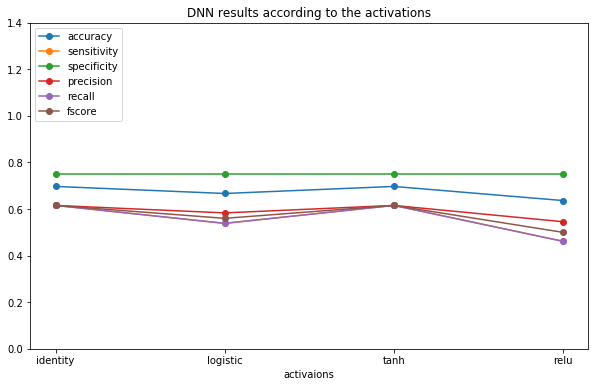

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hwk07/PycharmProjects/bioinformatics/DNN_lbfgsact.png'

In [7]:
from matplotlib import pyplot
import pandas as pd
from pandas import Series, DataFrame

fig = pyplot.figure(figsize=(10,6))
pyplot.title("DNN results according to the activations")
pyplot.ylim([0,1.4])
pyplot.xlabel("activaions")
pyplot.xticks(np.arange(4),act)
pyplot.plot(acc, label='accuracy', marker='o')
pyplot.plot(sen, label='sensitivity', marker='o')
pyplot.plot(spe, label='specificity', marker='o')
pyplot.plot(pre, label='precision', marker='o')
pyplot.plot(rec, label='recall', marker='o')
pyplot.plot(fsc, label='fscore', marker='o')
pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

#fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/DNN_lbfgsact.png')

In [8]:
data = {'value': [accuracy, sensitivity, specificity, precision, recall, fscore]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.696970
sensitivity,0.538462
specificity,0.800000
precision,0.636364
recall,0.538462
fscore,0.583333


In [30]:
max_acc = max(acc)
id = acc.index(max_acc)

data = {'value': [acc[id], sen[id], spe[id], pre[id], rec[id], fsc[id]]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.848485
sensitivity,0.692308
specificity,0.950000
precision,0.900000
recall,0.692308
fscore,0.782609


In [31]:
acc = []
sen = []
spe = []
pre = []
rec = []
fsc = []

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

for i in act:
    clf = MLPClassifier(hidden_layer_sizes=(1024, 256, 32),
                    activation= i,
                    solver='sgd',
                    learning_rate_init=0.01)

    clf.fit(data_train, labels_train)

    prediction_test = clf.predict(data_test)
    probability_test = clf.predict_proba(data_test)[:,1]

    auc = roc_auc_score(labels_test, probability_test)

    tn, fp, fn, tp = confusion_matrix(labels_test, prediction_test).ravel()
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fscore = 2 * precision * recall / (precision + recall)

    acc.append(accuracy)
    sen.append(sensitivity)
    spe.append(specificity)
    pre.append(precision)
    rec.append(recall)
    fsc.append(fscore)

C:\Users\hwk07\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


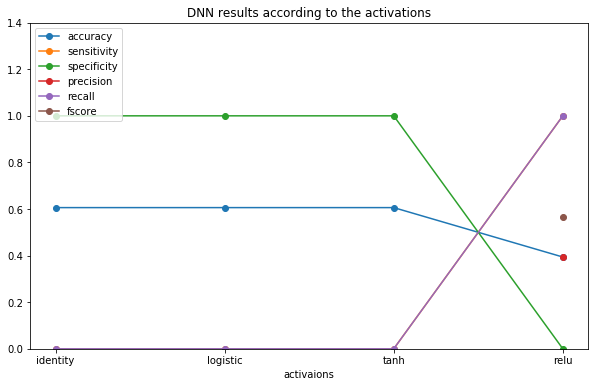

In [32]:
from matplotlib import pyplot
import pandas as pd
from pandas import Series, DataFrame

fig = pyplot.figure(figsize=(10,6))
pyplot.title("DNN results according to the activations")
pyplot.ylim([0,1.4])
pyplot.xlabel("activaions")
pyplot.xticks(np.arange(4),act)
pyplot.plot(acc, label='accuracy', marker='o')
pyplot.plot(sen, label='sensitivity', marker='o')
pyplot.plot(spe, label='specificity', marker='o')
pyplot.plot(pre, label='precision', marker='o')
pyplot.plot(rec, label='recall', marker='o')
pyplot.plot(fsc, label='fscore', marker='o')
pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/DNN_sgdact.png')

In [11]:
data = {'value': [accuracy, sensitivity, specificity, precision, recall, fscore]}
DataFrame(data, index=['accuracy', 'sensitivity', 'specificity', 'precision', 'recall', 'fscore'])

,value
accuracy,0.393939
sensitivity,1.000000
specificity,0.000000
precision,0.393939
recall,1.000000
fscore,0.565217


In [34]:
print(tp)
print(fp)
print(tn)
print(fn)

13
20
0
0


In [50]:
accuracies = [0.727273, 0.606061, 0.757576, 0.757576, 0.848485]
specificities = [0.95, 0.7, 0.7, 0.85, 0.95]
precisions = [0.833333, 0.5, 0.647059, 0.727273, 0.9]
recalls = [0.384615, 0.461538, 0.86154, 0.615385, 0.692308]
fscores = [0.526316, 0.48, 0.733333, 0.666667, 0.782609]

index = ['KNN', 'N B', 'I G', 'SVM', 'DNN']

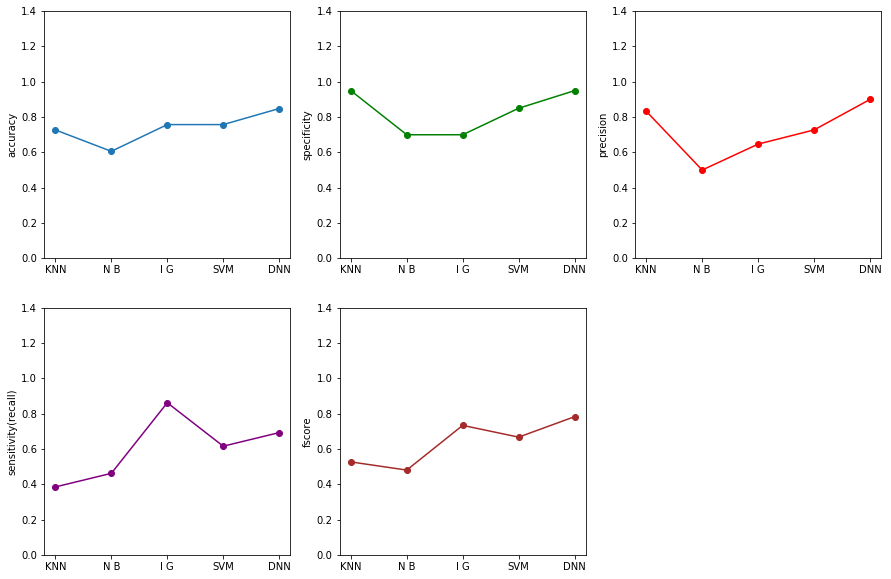

In [71]:
#pyplot.title("classfication evaluation")
fig = pyplot.figure(figsize=(15,10))
pyplot.subplot(2,3,1)
pyplot.ylim([0,1.4])

pyplot.xticks(np.arange(5),index)
pyplot.ylabel("accuracy")
pyplot.plot(accuracies, label='accuracy', marker='o')
pyplot.subplot(2,3,2)
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("specificity")
pyplot.plot(specificities, label='specificity', marker='o', color = 'green')
pyplot.subplot(2,3,3)
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("precision")
pyplot.plot(precisions, label='precision', marker='o', color = 'Red')
pyplot.subplot(2,3,4)
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("sensitivity(recall)")
pyplot.plot(recalls, label='recall', marker='o', color = 'Purple')
pyplot.subplot(2,3,5)
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("fscore")
pyplot.plot(fscores, label='fscore', marker='o', color = 'Brown')
#pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/values1.png')

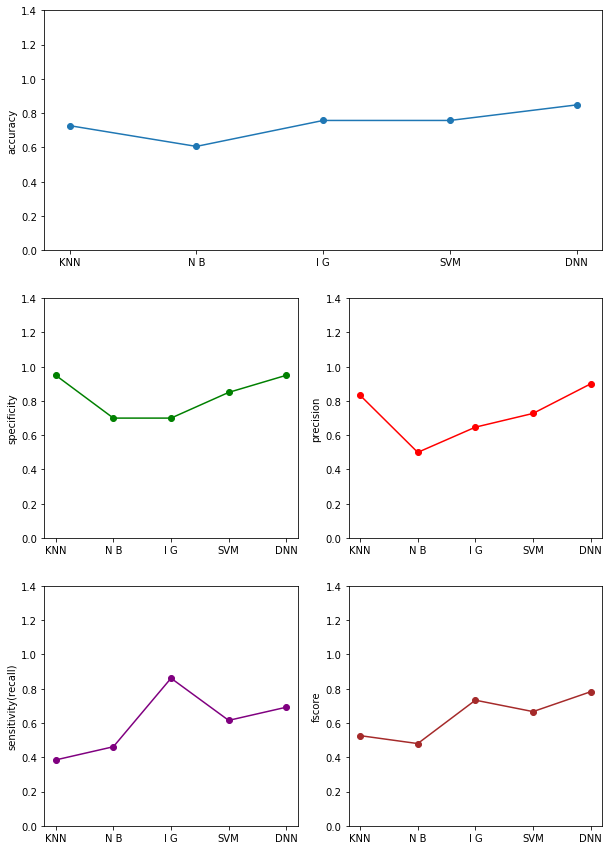

In [67]:
#pyplot.title("classfication evaluation")
fig = pyplot.figure(figsize=(10,15))
grid = pyplot.GridSpec(3, 2)
pyplot.subplot(grid[0, :])
pyplot.ylim([0,1.4])
#pyplot.xlabel("classfications")
pyplot.xticks(np.arange(5),index)
pyplot.ylabel("accuracy")
pyplot.plot(accuracies, label='accuracy', marker='o')
pyplot.subplot(grid[1, 0])
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("specificity")
pyplot.plot(specificities, label='specificity', marker='o', color = 'green')
pyplot.subplot(grid[1, 1])
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("precision")
pyplot.plot(precisions, label='precision', marker='o', color = 'Red')
pyplot.subplot(grid[2, 0])
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("sensitivity(recall)")
pyplot.plot(recalls, label='recall', marker='o', color = 'Purple')
pyplot.subplot(grid[2, 1])
pyplot.xticks(np.arange(5),index)
pyplot.ylim([0,1.4])
pyplot.ylabel("fscore")
pyplot.plot(fscores, label='fscore', marker='o', color = 'Brown')
#pyplot.legend(loc='upper left', prop={'size': 10})
pyplot.show()

fig.savefig('C:/Users/hwk07/PycharmProjects/bioinformatics/values.png')